In [1]:
import pandas as pd
import numpy as np
import requests

# Viz
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,8.)})
sns.set_style("whitegrid")

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [4]:
# Making a POST request to add a new review to the database

my_params= {'author_name': 'May', 
            'movie_name': 'Shrek 4', 
            'new_review': 'Amazing movie!', 
            'new_rating': 10, 
            'year': 2022}

url = 'http://127.0.0.1:5000/newreview/'

res = requests.post(url, params = my_params)
res.text

'Review inserted!'

In [70]:
url = 'http://127.0.0.1:5000/moviesinfo/Before Sunrise'

res = requests.get(url)

b_sunrise = pd.DataFrame(res.json())

In [71]:
url = 'http://127.0.0.1:5000/moviesinfo/Before Sunset'

res = requests.get(url)

b_sunset = pd.DataFrame(res.json())

In [72]:
url = 'http://127.0.0.1:5000/moviesinfo/Before Midnight'

res = requests.get(url)

b_midnight = pd.DataFrame(res.json())
b_midnight.sample()

,year,movie_name,avg_sentiment_compound,avg_rating,number_of_ratings,number_of_reviews
46,2015,Before Midnight,0.561233,6.7222,18,18


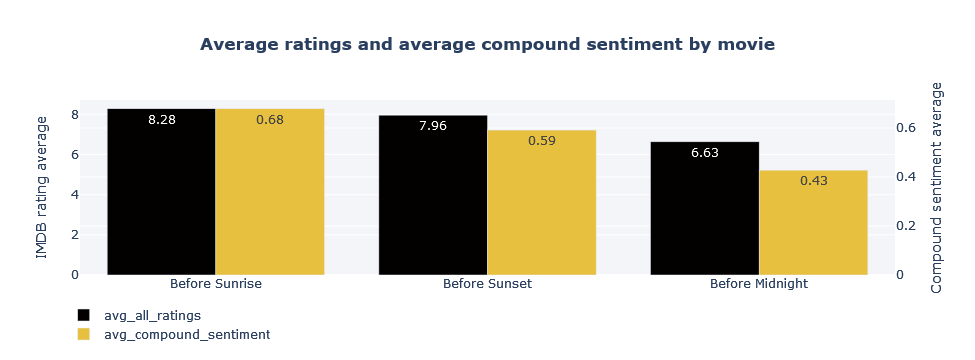

In [272]:
avg_all_ratings = go.Figure(
    data=[
        go.Bar(name='avg_all_ratings', x=all_averages['name'], y=all_averages['avg_all_ratings'], 
               yaxis='y', offsetgroup=1, marker = dict(color = '#030000'), 
               text=round(all_averages['avg_all_ratings'], 2)),
        
        go.Bar(name='avg_compound_sentiment', x=all_averages['name'], y=all_averages['avg_compound_sentiment'], 
               yaxis='y2', offsetgroup=2, marker = dict(color = '#e6c03e'), 
               text=round(all_averages['avg_compound_sentiment'], 2))
    ],
    layout={
        'yaxis': {'title': 'IMDB rating average'},
        'yaxis2': {'title': 'Compound sentiment average', 'overlaying': 'y', 'side': 'right'}
    }
)

avg_all_ratings.update_layout(barmode='group', legend=dict(x=-0.02, y=-0.42), 
                  title='<b>Average ratings and average compound sentiment by movie',
                  title_x=0.5,
                  plot_bgcolor='rgba(240, 242, 247, 0.8)')
avg_all_ratings.show()

In [274]:
def plot_sentiment_number_of_reviews(movie_df):
    
    avg_sentiment = go.Scatter(
                    mode="lines",
                    x = movie_df['year'],
                    y = movie_df['avg_sentiment_compound'],
                    name = 'Avg. sentiment compound',
                    marker = dict(color = '#030000')
                    )
    
    number_reviews = go.Bar(
                    x = movie_df['year'],
                    y = movie_df['number_of_reviews'],
                    name='Number of reviews',
                    marker = dict(color = '#e6c03e'),
                    text=movie_df['number_of_reviews']
                    
    )
    
    fig = make_subplots(specs=[[{"secondary_y": True}]])
    
    fig.add_trace(avg_sentiment, secondary_y=True,)
    fig.add_trace(number_reviews)
    
    fig['layout'].update(#height = 600, width = 1000, 
                         title = f"<b>'{movie_df['movie_name'][0]}': Number of Reviews on IMDB x Avg. Compound Sentiment",
                         xaxis_title="Year",
                         yaxis2_title="Avg. sentiment compound",
                         yaxis_title="Number of reviews",
                         plot_bgcolor='rgba(240, 242, 247, 0.8)',
                         title_y=0.95,
                         title_x=0.07,
                         legend=dict(x=-0.02, y=-0.5),
                         font=dict(size=10)
    )


    return fig

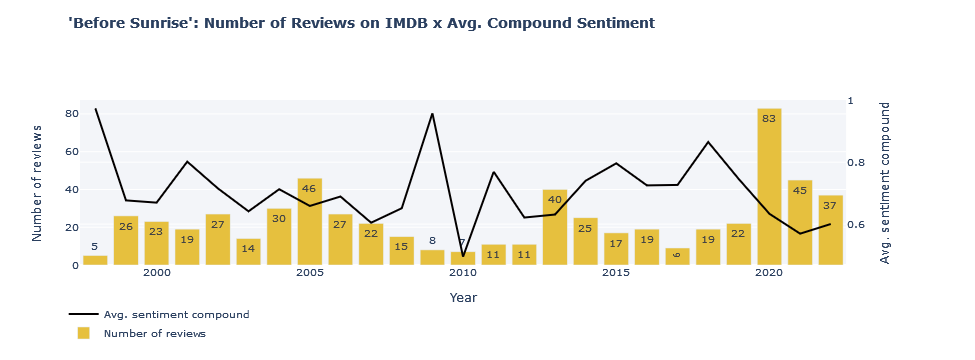

In [275]:
avg_sentiment_per_year_sunrise = plot_sentiment_number_of_reviews(b_sunrise)
avg_sentiment_per_year_sunrise.show()

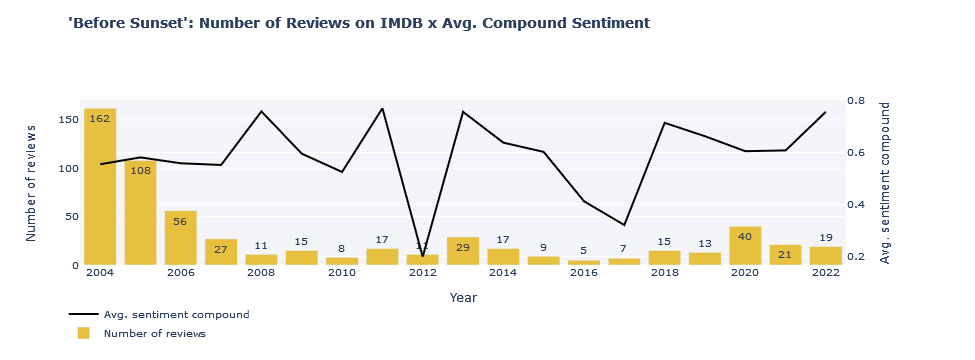

In [276]:
avg_sentiment_per_year_sunset= plot_sentiment_number_of_reviews(b_sunset)
avg_sentiment_per_year_sunset.show()

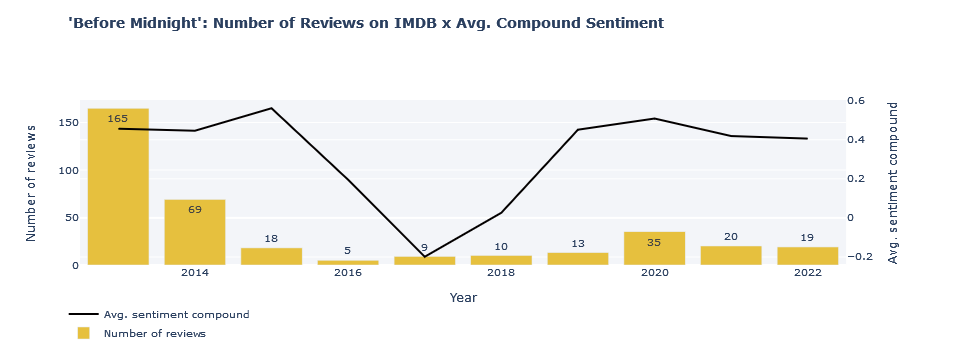

In [277]:
avg_sentiment_per_year_midnight = plot_sentiment_number_of_reviews(b_midnight)
avg_sentiment_per_year_midnight

In [7]:
url = 'http://127.0.0.1:5000/averages'

res = requests.get(url)

all_averages = pd.DataFrame(res.json())
all_averages

,avg_all_ratings,avg_compound_sentiment,name
0,8.2784,0.678695,Before Sunrise
1,7.9602,0.591695,Before Sunset
2,6.6337,0.428126,Before Midnight


In [11]:
url = 'http://127.0.0.1:5000/moviesinfo/Before Sunrise/'

res = requests.get(url)

sentiment_per_year = pd.DataFrame(res.json())
sentiment_per_year

,year,movie_name,avg_sentiment_compound,avg_rating,number_of_ratings,number_of_reviews
0,1998,Before Sunrise,0.974220,9.8000,5,5
1,1999,Before Sunrise,0.676642,8.6957,23,26
2,2000,Before Sunrise,0.669378,9.4118,17,23
3,2001,Before Sunrise,0.801768,8.0769,13,19
4,2002,Before Sunrise,0.715356,8.7647,17,27
5,2003,Before Sunrise,0.641386,8.7143,7,14
6,2004,Before Sunrise,0.712683,8.8947,19,30
7,2005,Before Sunrise,0.658689,7.9524,42,46
8,2006,Before Sunrise,0.689130,8.1739,23,27
9,2007,Before Sunrise,0.604545,8.7222,18,22


In [273]:
# avg_all_ratings.write_image("figs/avg_all_ratings.jpeg", scale=2)
# avg_sentiment_per_year_midnight.write_image("figs/avg_sentiment_per_year_midnight.png", scale=2)
# avg_sentiment_per_year_sunset.write_image("figs/avg_sentiment_per_year_sunset.jpeg", scale=2)
# avg_sentiment_per_year_sunrise.write_image("figs/avg_sentiment_per_year_sunrise.jpeg", scale=2)